# Example notebook for using the MCMC

This notebook shows an example of how to use the classes from the MCMCs file.

## 0. Import everything needed

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

The classes needed are `Neal_3` and `PPMx` located in main_code.MCMCs.

The `generate_gaussian_mixture` function will create the synthetic data for our example.

`plot_clusters` is used for visualizations.

In [2]:
import sys, os
sys.path.insert(0, os.path.dirname(os.path.abspath('../../main_code')))
from main_code.MCMCs import Neal_3, PPMx
from main_code.data_generation import generate_gaussian_mixture
from main_code.visualization import plot_clusters

## 1. Generate data


For this example, we generate 3 clusters of 50 elements each, we also set the covariates to be gaussian distributed.


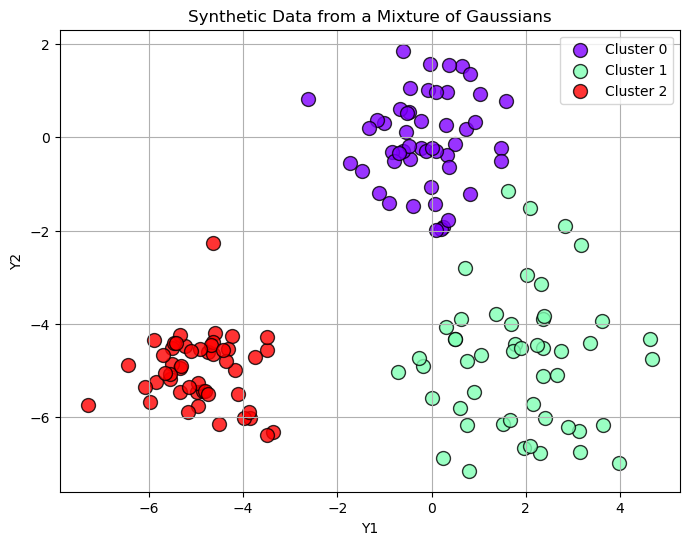

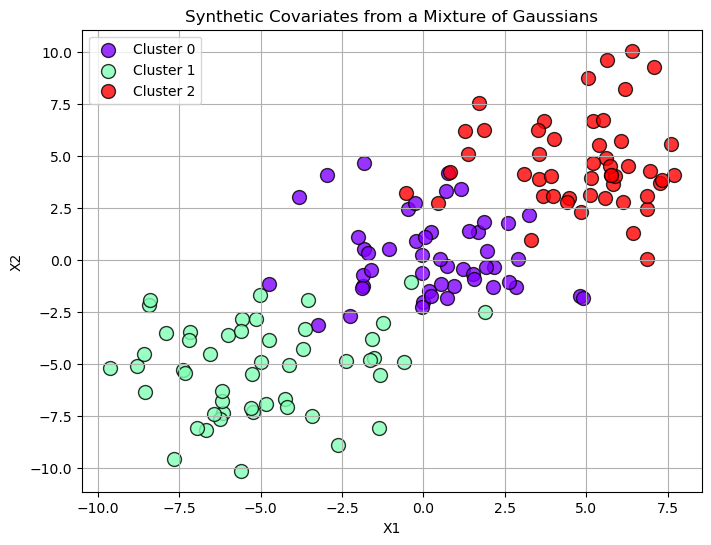

In [3]:
# Sample syntethic
np.random.seed(42)  # for reproducibility
random.seed(42)

# Y
means = [[0, 0], [2, -5], [-5, -5]]
covariances = [np.eye(2), 2 * np.eye(2), 0.5 * np.eye(2)]
n_samples = [50, 50, 50]

Y, labels = generate_gaussian_mixture(means, covariances, n_samples)

plot_clusters(Y, labels, "Synthetic Data from a Mixture of Gaussians", xlabel="Y1", ylabel="Y2")


# X
means_X = [[0, 0], [-5, -5], [5, 5]]
covariances_X = [np.eye(2)*5, np.eye(2)*5, np.eye(2)*5]

X, _ = generate_gaussian_mixture(means_X, covariances_X, n_samples)

plot_clusters(X, labels, "Synthetic Covariates from a Mixture of Gaussians")

## 2. Neal Algorithm 3 (without covariates)

### 2.1 Create the object

We try to cluster the data using only the Y data.

First step is to create a `Neal_3` object. By default the hyper-parameters $\alpha $ and $\lambda_0$ are set to `alpha=0.1` and `lamb_0=1` but they can be given as arguments when creating the object. Other hyper-parameters needs to be changed in the file or manually after creating the object.

In [4]:
neal_3 = Neal_3()

### 2.2 Fit it to data

Then we can fit the object to the data. That is, we apply neal algorithm 3 with our data. To do so, we call the `.fit()` method. The method must take the data `Y` and the number of step to do as arguments. 

It can also take `metrics` as argument. `metrics` must be a list of the containing the names of the metrics to compute while performing the MCMC (to later create trace plots). For now the only metric implemented in `"entropy"` but others might be added later.


Here we will just run this example for 100 iterations

In [9]:
history = neal_3.fit(Y, 100, metrics=["entropy"])

MCMC Progress:   0%|          | 0/100 [00:00<?, ?step/s]

MCMC Progress: 100%|██████████| 100/100 [00:44<00:00,  2.23step/s]


`fit()` will output the history but it is also stored in the object at `neal_3.history`

### 2.3 Visualize the results

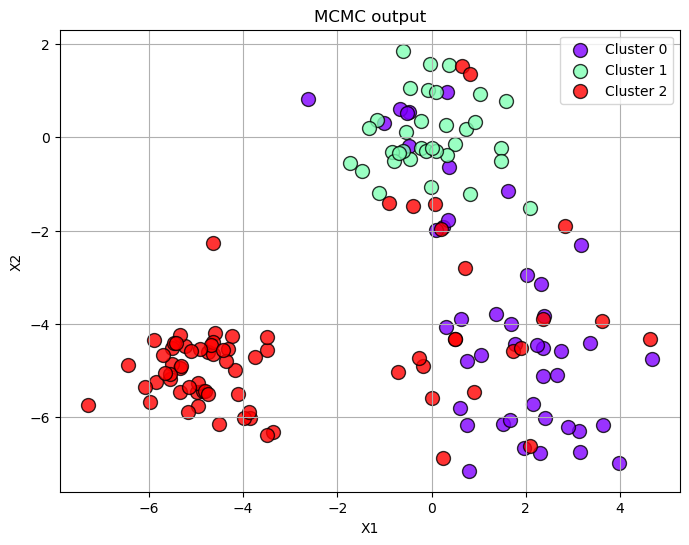

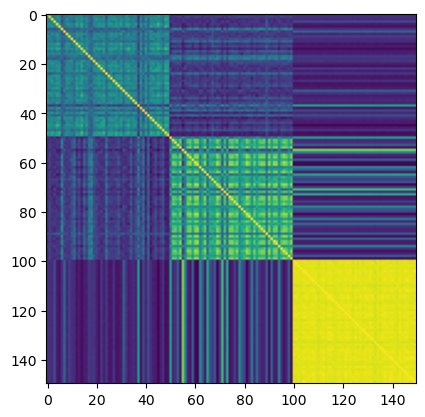

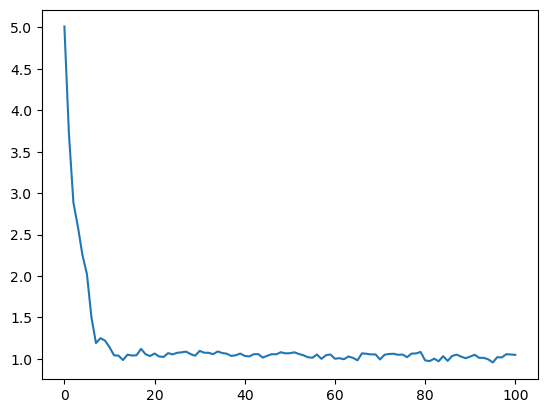

In [10]:
plot_clusters(Y, neal_3.history[-1], "MCMC output")
plt.show()
neal_3.compute_similarity_matrix()
plt.imshow(neal_3.similatity_matrix)
plt.show()
plt.plot(neal_3.metrics["entropy"])
plt.show()

### 2.4 Save object to file

After fitting the object, you may want to save it to a file to process/analyse the results later. To save the object, use the `.save(filepath)` method. Any attribute of the object will be saved to this file.

In [11]:
file_path = "test_save.mcmc"
neal_3.save(file_path)

### 2.5 Load object from file

To load the object from a file, use the class method `Neal_3.load(file_path)`. You can then use the object normally.

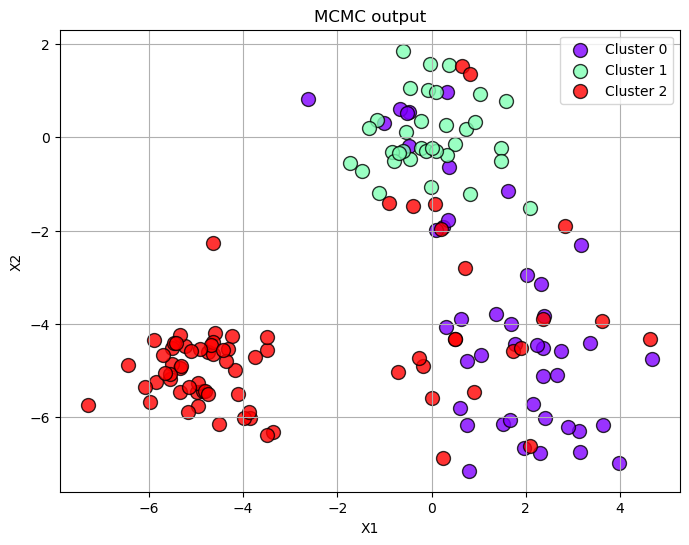

In [14]:
file_path = "test_save.mcmc"
neal_3_loaded = Neal_3.load(file_path)

# Example to show that the computed clustering is still accessible
plot_clusters(Y, neal_3_loaded.history[-1], "MCMC output")
plt.show()

## 3. PPMx : include covariates

### 3.1 Create the object

Create the object the same way as before.

In [15]:
ppmx = PPMx()

### 3.2 Fit to data

Now we have covariates so the `fit()` function takes `Y`, `X` and the number of steps as arguments. You can also specify `lambda_penalty` to control the covariate penalty. default is `lambda_penalty=0.1`.

In [16]:
history = ppmx.fit(Y, X, 100, metrics=["entropy"])

MCMC Progress:   0%|          | 0/100 [00:00<?, ?step/s]

MCMC Progress: 100%|██████████| 100/100 [01:04<00:00,  1.56step/s]


### 3.3 Visualize results

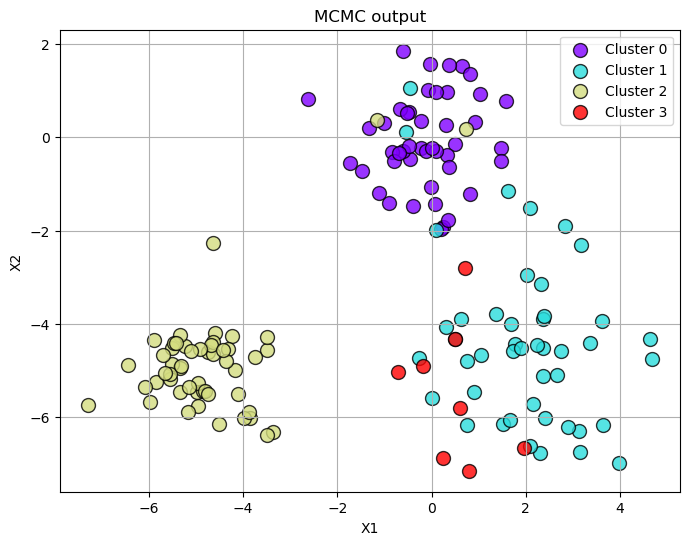

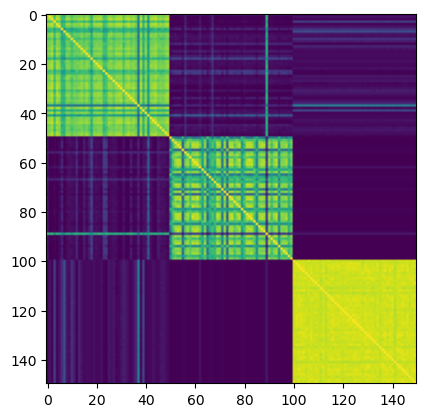

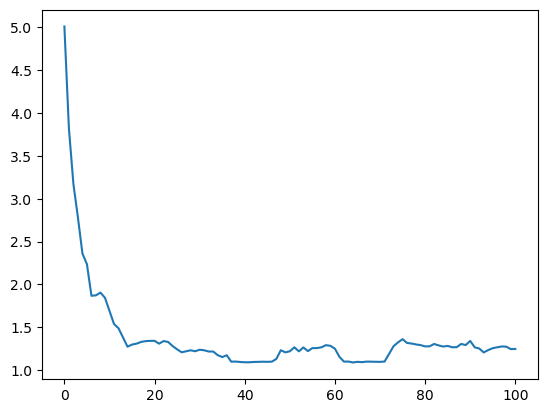

In [17]:
plot_clusters(Y, ppmx.history[-1], "MCMC output")
plt.show()
ppmx.compute_similarity_matrix()
plt.imshow(ppmx.similatity_matrix)
plt.show()
plt.plot(ppmx.metrics["entropy"])
plt.show()

### Save / Load results

You can save and load results in the same way as without covariates with the `.save()` and `.load()` methods.

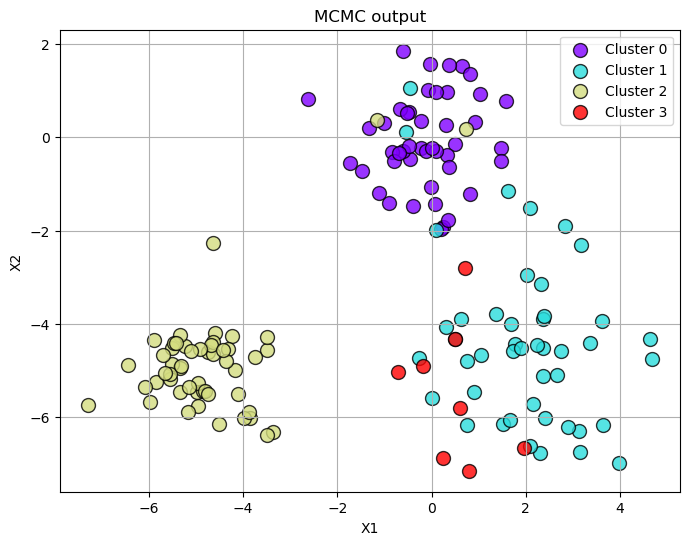

In [18]:
file_path = "test_save2.mcmc"
ppmx.save(file_path)

ppmx_loaded = PPMx.load(file_path)

plot_clusters(Y, ppmx_loaded.history[-1], "MCMC output")
plt.show()